In [4]:
import pandas as pd
import sklearn
import keras
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [5]:
keras.utils.set_random_seed(42)

# Load data

In [6]:
data = pd.read_csv("car_prices.csv")

In [7]:
data.head()

,age,price
0,5.25,87541.626856
1,19.95,18280.526625
2,2.55,222870.872293
3,13.35,19744.479634
4,4.65,97939.450232


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   price   400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB


<Axes: xlabel='age', ylabel='price'>

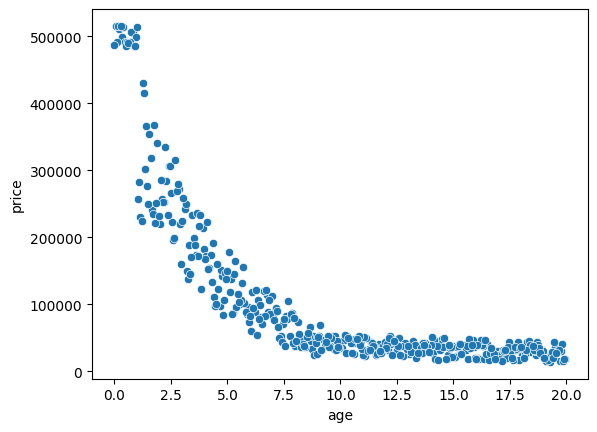

In [9]:
sns.scatterplot(data, x="age", y="price")

In [10]:
X = data["age"]

In [11]:
y = data["price"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model

## Main model architecture

In [13]:
n_input_features = 1

In [14]:
model = keras.Sequential([
    keras.layers.Input((n_input_features,)),  # If we write (n_input_features), it will simplify to int. If add a comma, it will be a single-element tuple
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,501 (80.08 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

## Loss and optimizer

In [16]:
optimizer = keras.optimizers.Adam(learning_rate=0.1)

In [17]:
model.compile(optimizer=optimizer, loss="mse")

In [18]:
initial_weights = model.get_weights()

# Train model

In [19]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26352924672.0000  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24187553792.0000 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15624822784.0000 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2518914048.0000 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2102274048.0000
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 993946752.0000  
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 794109568.0000 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 786664064.0000 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 786468992.0000 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 791904896.0000 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 794280640.0000  
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 795672704.0000 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 804399232.0000 
Epoch 14/20
10/10 ━━━━━━

In [20]:
def display_history(history):
    sns.lineplot(history.history)
    plt.grid()
    plt.xlabel("Epoch")

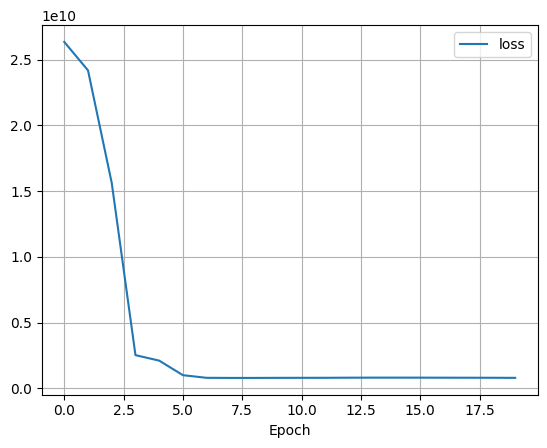

In [21]:
display_history(history)

### Evaluate on test set

In [22]:
model_predictions = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [23]:
model_predictions[:10]

array([[104010.87 ],
       [293265.97 ],
       [252218.11 ],
       [335345.72 ],
       [ 31919.096],
       [ 29581.441],
       [ 28497.08 ],
       [ 35615.473],
       [ 40526.62 ],
       [ 29129.623]], dtype=float32)

In [24]:
y_test[:10]

209    146131.850919
280    354145.144951
33     253320.538590
210    415943.884996
93      33642.151122
84      35379.990092
329     38314.337842
94      33593.705025
266     52666.704729
126     46422.623284
Name: price, dtype: float64

In [25]:
mean_absolute_error(y_test, model_predictions)

19459.67235694483

## Try training for longer

In [26]:
# Reset optimizer state
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss="mse")

# By default the weights don't reset with new training – model remembers what it has learned
model.set_weights(initial_weights)

In [27]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 26352924672.0000  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24187553792.0000 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15624822784.0000 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2518914048.0000 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2102274048.0000
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 993946752.0000  
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 794109568.0000 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 786664064.0000 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 786468992.0000 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 791904896.0000  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 794280640.0000 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 795672704.0000 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 804399232.0000 
Epoch 14/10

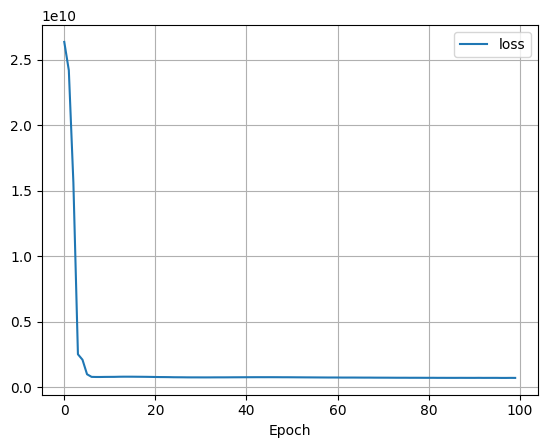

In [28]:
display_history(history)

In [29]:
mean_absolute_error(y_test, model.predict(X_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


19949.177973831724

# Monitor test loss while training

In [30]:
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss="mse")

model.set_weights(initial_weights)

In [31]:
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 26352924672.0000 - val_loss: 19401830400.0000
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24187553792.0000 - val_loss: 17118222336.0000
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 15624822784.0000 - val_loss: 1787691264.0000
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2518914048.0000 - val_loss: 3164392448.0000
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2102274048.0000 - val_loss: 1535154432.0000
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 993946752.0000 - val_loss: 948992704.0000
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 794109568.0000 - val_loss: 980904128.0000
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 786664064.0000 - val_loss: 979871232.0000
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 786468992.0000 - val_loss: 1009063616.0000
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 791904

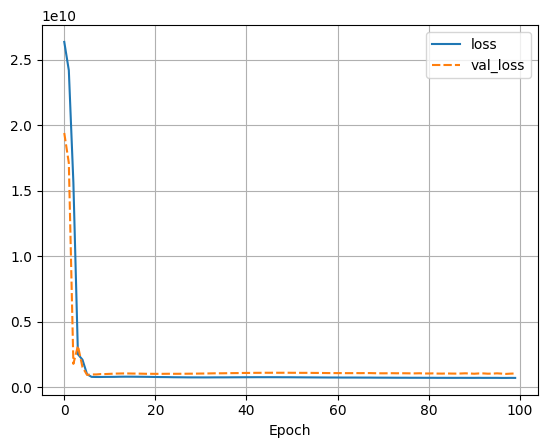

In [32]:
display_history(history)

(0.0, 2000000000.0)

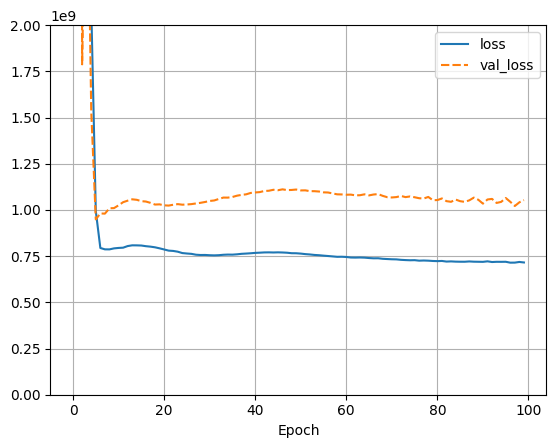

In [33]:
display_history(history)
plt.ylim(0, 2e9)

Spoiler blocker

.

.

.

.

.

.

.

.

.

# Callbacks

## Early stopping

In [34]:
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss="mse")

model.set_weights(initial_weights)

In [35]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")

In [36]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_train, y_train), callbacks=[early_stopping])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 26352924672.0000 - val_loss: 24889901056.0000
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24187553792.0000 - val_loss: 22324269056.0000
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15624822784.0000 - val_loss: 2745140224.0000
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2518914048.0000 - val_loss: 2732130816.0000
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2102274048.0000 - val_loss: 1304613120.0000
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 993946752.0000 - val_loss: 778696320.0000
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 794109568.0000 - val_loss: 768026880.0000
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 786664064.0000 - val_loss: 759010752.0000
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 786468992.0000 - val_loss: 779596928.0000
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 

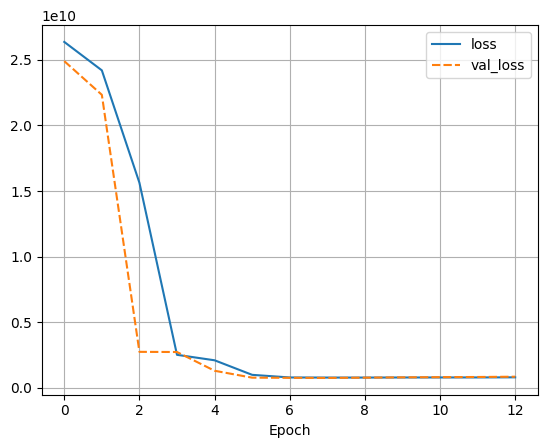

In [37]:
display_history(history)

## Auto reduce LearningRate

In [38]:
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss="mse")

model.set_weights(initial_weights)

In [39]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.1, monitor="val_loss")

In [40]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 26352924672.0000 - val_loss: 19401830400.0000 - learning_rate: 0.1000
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24187553792.0000 - val_loss: 17118222336.0000 - learning_rate: 0.1000
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15624822784.0000 - val_loss: 1787691264.0000 - learning_rate: 0.1000
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2518914048.0000 - val_loss: 3164392448.0000 - learning_rate: 0.1000
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2102274048.0000 - val_loss: 1535154432.0000 - learning_rate: 0.1000
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 993946752.0000 - val_loss: 948992704.0000 - learning_rate: 0.1000
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 794109568.0000 - val_loss: 980904128.0000 - learning_rate: 0.1000
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 786664064.0000 - val_loss: 979871232

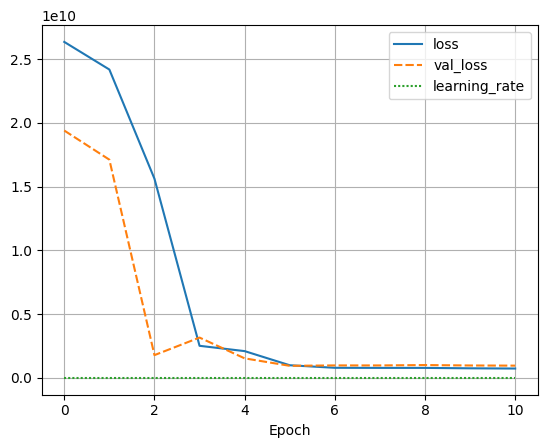

In [41]:
display_history(history)

# Validation set

In [42]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

In [44]:
optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss="mse")

model.set_weights(initial_weights)

In [45]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.1, monitor="val_loss")

In [46]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[reduce_lr, early_stopping])

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 28315117568.0000 - val_loss: 23624097792.0000 - learning_rate: 0.1000
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26890786816.0000 - val_loss: 22527105024.0000 - learning_rate: 0.1000
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 24358735872.0000 - val_loss: 17262938112.0000 - learning_rate: 0.1000
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13564063744.0000 - val_loss: 1485655936.0000 - learning_rate: 0.1000
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2640987392.0000 - val_loss: 2793901824.0000 - learning_rate: 0.1000
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1590386560.0000 - val_loss: 2029785856.0000 - learning_rate: 0.1000
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1088849920.0000 - val_loss: 1694924032.0000 - learning_rate: 0.1000
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1008087744.0000 - val_loss: 1420093056.0000 -

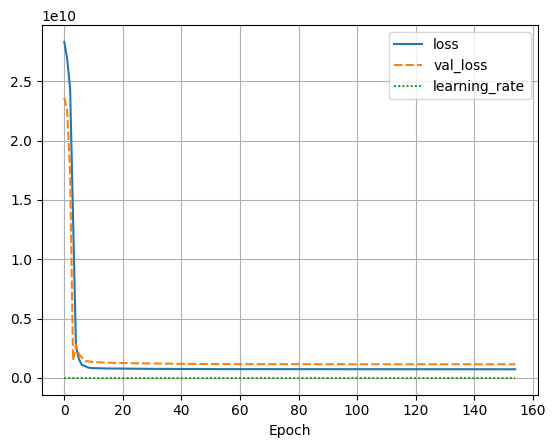

In [47]:
display_history(history)

In [48]:
mean_absolute_error(y_test, model.predict(X_test))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000028E97598C20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


14920.221803877832